# Example: Multidimensional Geometric Brownian Motion (MGBM)
Fill me in

## Setup
Fill me in

In [1]:
include("Include.jl");

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Manifest.toml`
  Activating project at `~/Desktop/julia_work/CHEME-5660-Examples-F23`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Manifest.toml`


In [31]:
Δt = (1.0/252.0);
T = 48.0*(Δt);
number_of_steps = 48;
number_of_states = 2;
number_of_trials = 10;

## Setup the model

In [3]:
μ = [0.10,0.05];

In [46]:
Σ = zeros(2,2);
Σ[1,1] = 0.10
Σ[1,2] = -0.05
Σ[2,1] = -0.05
Σ[2,2] = 0.05;

In [47]:
factors = cholesky(Σ);
A = factors.U |> x-> Matrix(x)
Â = diagm(0 => diag(A))

2×2 Matrix{Float64}:
 0.316228  0.0
 0.0       0.158114

In [19]:
sqrt()

0.22360679774997896

In [15]:
Sₒ = [20.0,20.0];

In [28]:
time_array = range(0, stop = T, length = number_of_steps) |> collect;

## MGBM Simulation

In [52]:
simulation_dictionary = Dict{Int64,Array{Float64,2}}();
for trial_index ∈ 1:number_of_trials
    simulation_array = Array{Float64,2}(undef, number_of_steps, 3);
    for i ∈ eachindex(time_array)
        t = time_array[i];
        simulation_array[i,1] = t;

        # compute the noise -
        noise_vector = A*rand(number_of_states);

        for j ∈ 1:number_of_states
            simulation_array[i,j+1] = Sₒ[j]*exp((μ[j] - Σ[j,j]/2)*t + (√t)*noise_vector[j]);
        end
    end
    simulation_dictionary[trial_index] = simulation_array;
end

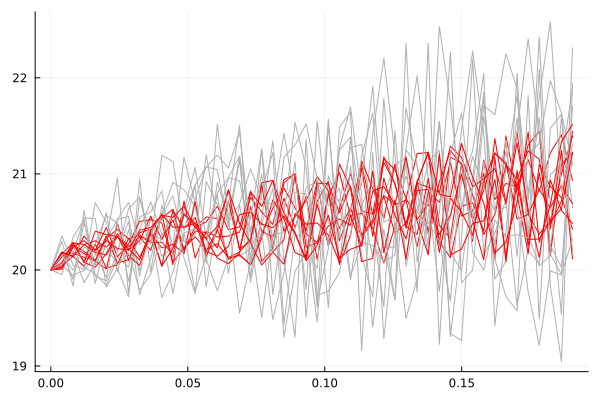

In [53]:
p = plot();
for (key, simulation_array) ∈ simulation_dictionary
    
    plot!(simulation_array[:,1],simulation_array[:,2], label="", c=:gray69);
    plot!(simulation_array[:,1],simulation_array[:,3], label="", c=:red)
end
current()

In [34]:
A

2×2 Matrix{Float64}:
 0.458258  -0.109109
 0.0        0.19518